In [1]:
import time
import timeit
import math

import numpy as np
import timeit
import numba as nb
import importlib

In [34]:
_number = int(8e3)
one_expr = r"0.44*exp(-407.0*Tgas**(-1/3)+824.0*Tgas**(-2/3))"
_multi_list = []
for i in range(_number):
    _random_n = np.random.randn()
    _multi_list.append(f"{_random_n:.2f}*exp(-407.0*Tgas**(-1/3)+824.0*Tgas**(-2/3))")
    # _multi_list.append(f"{_random_n:.2f} + Tgas")
_str = ",".join(_multi_list)
multi_expr = "[" + _str + "]"

one_expr_compiled = compile(one_expr,'<string>','eval')
multi_expr_compiled = compile(multi_expr,'<string>','eval')
one_expr_lamb = eval('lambda Tgas: ' + one_expr,{"__builtins__":__builtins__,"exp":math.exp},{})
multi_expr_lamb = eval('lambda Tgas:' + multi_expr,{"__builtins__":__builtins__,"exp":math.exp})

In [35]:
%timeit eval(multi_expr,{"__builtins__":__builtins__,},dict(exp=math.exp,Tgas=2000))
%timeit eval(multi_expr_compiled,{"__builtins__":__builtins__,"exp":math.exp,"Tgas":2000})
%timeit multi_expr_lamb(Tgas=2000)

151 ms ± 569 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.47 ms ± 32.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.28 ms ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%cd "C:\Users\LiuJinbao\Documents\Code\PlasmaChemistry"

C:\Users\LiuJinbao\Documents\Code\PlasmaChemistry


In [45]:
with open(r"_cache/cache_template.py") as f:
    _str = f.readlines()
_str = "".join(_str)
_list = [f"value[{i}] = {_}" for i,_ in enumerate(_multi_list)]
# _list = [f"va.append({_})" for i,_ in enumerate(_multi_list)]
# _list = [f"{_}" for i,_ in enumerate(_multi_list)]
# _multi_expr_str = "\n    ".join(_list)
_multi_expr_str = "\n    ".join(_list)

In [46]:
# _str_to_write = _str.replace('"""__REPLACE__"""', f"a = np.zeros({_number})\n    {_multi_expr_str}")
_str_to_write = _str.replace('"""__REPLACE__"""', f"{_multi_expr_str}")

In [47]:
with open(r"_cache/cache.py", "r+") as f:
    f.seek(0)
    f.truncate()
    f.write(_str_to_write)

In [48]:
start = time.time()
from _cache import cache
import importlib
importlib.reload(cache)
end = time.time()

In [50]:
a = np.zeros(_number)
start = time.time()
cache.test(a, 3000.0)
end = time.time()

In [49]:
print(f"{end-start:.1f} s")

179.5 s


In [51]:
%timeit cache.test(a, 3000)

3.6 µs ± 6.01 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


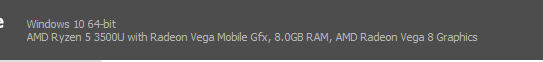
8000 reactions

(numpy)exec time   :   4.4 ms

(numba)exec time   :   3.6 us

1000 higher speed

compile time   : 179.5  s